# Extracción de características

En este cuaderno vamos a extraer dos características sencillas de los conjuntos de datos *1000ceros.csv* y *1000unos.csv*: la "anchura" y la "altura" de la cifra que se ve en una imagen.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

In [1]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)

#--Quick rescale to [0,1] given that any pixel is in [0,255]
FullSet_0 = (FullSet_0 / 255.0)
FullSet_1 = (FullSet_1 / 255.0)

Vamos a crear dos características (*feature*) a partir de los píxeles de una imagen elegida con la variable **seleccion**.

Para ello calcularemos la suma de cada fila y de cada columna de la imagen, y después la normalizaremos a [0,1]. 

Las dos características que vamos a calcular son la *anchura* y *altura* de la imagen.

+ La *anchura* = número de columnas entre la primera y la última que tienen más de un $\theta$ % del máximo
+ La *altura*  = número de filas entre la primera y la última que tienen más de un $\theta$ % del máximo<br>
    ( $\theta$  es otra variable ) 

Finalmente creamos un dataframe con ambas

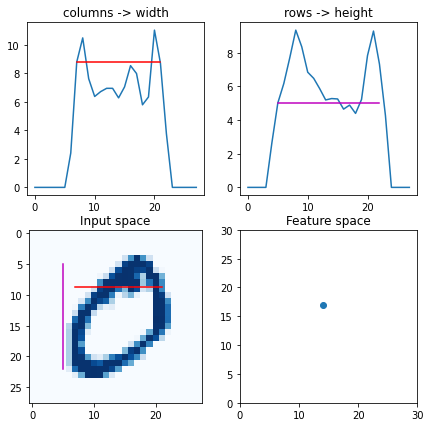

,width,height
0,14,17


In [3]:
theta = 0.5  #<- feature parameter
seleccion = 0 #<- index of the selected instance

x = FullSet_0.iloc[seleccion].values.reshape([28,28])

#--width feature
sum_cols = x.sum(axis=0)
indc = np.argwhere(sum_cols > theta * sum_cols.max())
width = indc[-1] - indc[0]

#--height feature
sum_rows = x.sum(axis=1)
indr = np.argwhere(sum_rows > theta * sum_rows.max())
height = indr[-1] - indr[0]
features_df = pd.DataFrame({'width':width, 'height':height})

##------------ we can visualize and print the two features 
plt.rcParams['figure.figsize'] = [7,7] #<- this makes the figures larger in Jupyter
plt.subplot(221)
plt.plot(sum_cols)
plt.plot(indc[[0,-1]],sum_cols[indc[[0,0]]],'r')
plt.title('columns -> width')
plt.subplot(222)
plt.plot(sum_rows)
plt.plot(indr[[0,-1]],sum_rows[indr[[0,0]]],'m')
plt.title('rows -> height')
plt.subplot(223)
plt.imshow(x,cmap='Blues')
plt.plot(indc[[0,-1]],sum_cols[indc[[0,0]]],'r')
plt.plot(sum_rows[indr[[0,0]]],indr[[0,-1]],'m')
plt.title('Input space')
plt.subplot(224)
plt.plot(width,height,'o')
plt.axis([0,30,0,30])
plt.title('Feature space')
plt.show()
features_df

En la celda de arriba hemos credo dos características a partir de la imagen.

Al principio, la imagen $x$(escalada al intervalo unidad) se puede considerar como un punto en el espacio ${[0,1]}^{28\times28}$. <br>
Sin embargo no todos los píxeles aportar información útil. 

La ingeniería de características consiste en extraer la información que pueda ser relevante para describir el dato de entrada *crudo*.<br>
En este caso, hemos diseñado una manera de extraer la *altura* y la *anchura* del número de entrada.
Este método se puede ver como dos funciones $f_H$ y $f_W$ que mapean el dato de entrada a una característica

$f_H : {[0,1]}^{28\times28} \longrightarrow \mathbb{R}$, tal que  $f_H(x) = \mathrm{height}, \quad$
y
$\quad f_W : {[0,1]}^{28\times28} \longrightarrow \mathbb{R}$, tal que  $f_W(x) = \mathrm{width}.$

En definitiva, la imagen de resolución $28\times28$ se representa por un punto 2D (height,width), que podemos pintar facilmente.

En la figura se denomina "espacio de entrada" (*input space*) al espacio donde viven los datos de entrada *crudos*, y "espacio de características" (*feature space*) al espacio donde viven las representación de los datos diseñadas o elegidas.

### Ejercicio
En la celda de arriba hemos creado un vector 2D de características (*height*, *width*) para **una** imagen seleccionada de un dataframe.

Pero la extracción de características se debe realizar sobre todos los datos (entrenamiento, validación, test, y los datos nuevos que lleguen una vez se ponga la máquina en producción). Por tanto nos conviene tener una función que realice esta tarea sobre un dataframe


Crear una función **feat_width** que:
+ Reciba un dataframe, del cual sabemos lo que representa cada fila y columna
    - En esta caso cada fila es una imagen de 0 o de 1, serializada en un vector de 784 elementos.
    - Cada columna es el valor de un pixel, normalizado al intervalo [0,1]
    - Todas las imágenes son en escala de grises, por lo que no hay 3 canales (R,G,B), sólo 1.
+ Reciba un parametro **theta** para ajustar la característica, por defecto = 0.1    
+ Devuelva un dataframe con una columna llamada **width** y tantas filas como filas tiene el dataframe de entrada

Después crear otra función **feat_height** con las mismas características, pero para la altura (**height**)

**Ayuda:** Una matriz de 1000 filas y 784 columnas (1000 x 784) se puede transformar en otra de 1000 x 28 x 28<br>
Prueba el siguiente código para verlo mejor:

    data = FullSet_0.values           #<- volcado del dataframe en un numpy array de forma 1000x784 
    data = data.reshape([1000,28,28]) #<- cambiamos la forma de 'data', de matriz 2D pasa a 3D
    plt.imshow(data[15,:,:])          #<- mostrar la imagen número 15 <br>

**Comentario** Recuerda que utilizar bucles es inneficiente cuando se usan lenguajes o bibliotecas optimizadas para vectores como Matlab o Numpy. Hay que intentar pensar en como operar con las matrices N-dimensionales; o al menos intentar operar con matrices 2D. <br>
Por ejemplo, cuando tratamos con imágenes en escala de grises, podemos utilizar el eje 0 para indexarlas, el eje 1 para las filas y el eje 2 para las columnas de la matriz 2D que representa cada imagen. <br>
Así podemos utilizar un for para recorrer cada imagen y luego utilizar los métodos matriciales para evitar recorrer las filas y las columnas.


**¡Cuidado!** Cuando se hace **reshape** para pasar de 2D a 3D con el código de arriba, la matriz 28x28 se forma colocando una fila de 28 elementos sobre otra. Prueba el siguiente código para verlo mejor:

    foo=np.ceil(np.random.rand(2,12)*10)
    print('\n original-------------------\n'); print(foo)
    print('\n reshape([2,3,4])-----------\n'); print(foo.reshape([2,3,4]))

In [4]:
# Suma las columnas de cada imagen del dataset y las almacena en un array
def feat_width(data, theta=0.1):
    width = np.zeros(data.shape[0])
    data = data.values.reshape([data.shape[0], 28, 28])
    for i in range(data.shape[0]):
        sum_cols = data[i].sum(axis=0)
        indc = np.argwhere(sum_cols > theta * sum_cols.max())
        width[i] = indc[-1] - indc[0]
    return width

# Suma las filas de cada imagen del dataset y las almacena en un array
def feat_height(data, theta=0.1):
    height = np.zeros(data.shape[0])
    data = data.values.reshape([data.shape[0], 28, 28])
    for i in range(data.shape[0]):
        sum_rows = data[i].sum(axis=1)
        indc = np.argwhere(sum_rows > theta * sum_rows.max())
        height[i] = indc[-1] - indc[0]
    return height

x = feat_width(FullSet_0)

### Ejercicio
Visualizar la anchura frente a la altura de cada uno de las imágenes de *FullSet_0* y de *FullSet_1*.<br>
+ Puedes elegir el **theta** que quieras.
+ Utiliza un color diferente para cada una de ellas. Además es recomendable utilizar un nivel de transparencia (alpha) bajo, entre 0.1 y 0.2.

Como habrá muchos pares (anchura,altura) que coincidan, una buena idea es separarlos un poco añadiendo una agitación o *jitter*. En el siguiente código es una función que genera un *jitter* gaussiano, centrado en 0 y con una desviación *sigma*, que además puede ser positivo o negativo, sobre un vector de numpy o una serie de pandas, X.

    def jitter(X,sigma=0.3):
        random_sign = (-1)**np.random.randint(1,3,*X.shape)
        return X + np.random.normal(0,sigma,*X.shape)*random_sign

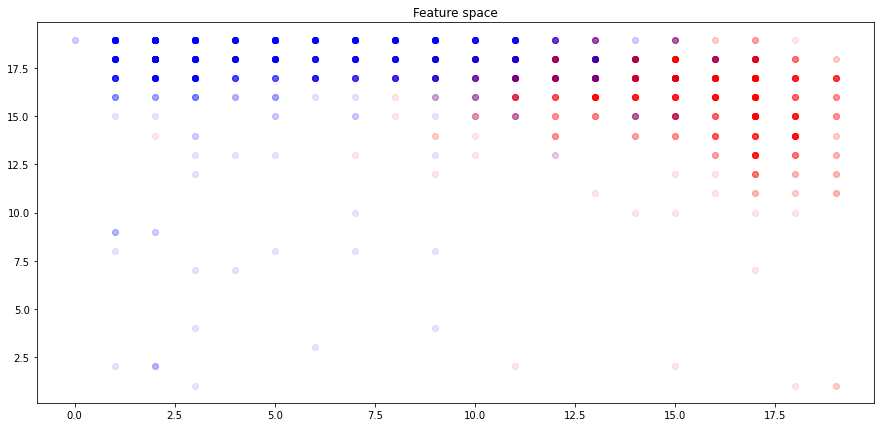

In [5]:
theta = 0.5  #<- feature parameter

#--width feature
width_0 = feat_width(FullSet_0,theta)
width_1 = feat_width(FullSet_1,theta)

#--height feature
height_0 = feat_height(FullSet_0,theta)
height_1 = feat_height(FullSet_1,theta)

##------------ we can visualize and print the two features
plt.rcParams['figure.figsize'] = [15,7] #<- this makes the figures larger in Jupyter
plt.scatter(width_0,height_0, c="red", alpha=0.1)
plt.scatter(width_1, height_1, c="blue", alpha=0.1)
plt.title('Feature space')
plt.show()

### Ejercicio
1. Crear la función **feat_3max_cols** que reciba un dataframe con las imágenes serializadas y devuelva un dataframe con 3 columnas y 1000 filas.
    - cada fila de los dataframes se corresponden con una imagen
    - las columnas del dataframe obtenido son las columnas donde se encuentran los máximos de anchura (ver la primera imagen)
    
2. Crear la función **feat_3max_rows** que reciba un dataframe con las imágenes serializadas y devuelva un dataframe con 3 columnas y 1000 filas.
    - cada fila de los dataframes se corresponden con una imagen
    - las columnas del dataframe obtenido son las columnas donde se encuentran los máximos de altura (ver la primera imagen)
    
3. Añadir a los dataframes **FeatSet_0** y **FeatSet_1** las nuevas 6 características

4. Visualizar diferentes pares de características usando el mísmo código de colores que arriba.

In [6]:
def feat_3max_cols(data):
    width = np.zeros((data.shape[0], 3))
    df = data.values.reshape([data.shape[0], 28, 28])
    for i in range(df.shape[0]):
        sum_cols = df[i].sum(axis=0)
        width[i] = np.argsort(sum_cols)[-3:]
    return pd.DataFrame(width, columns= ["W1", "W2", "W3"])

def feat_3max_rows(data):
    higth = np.zeros((data.shape[0],3))
    df = data.values.reshape([data.shape[0], 28, 28])
    for i in range(data.shape[0]):
        sum_rows = df[i].sum(axis=1)
        higth[i] = np.argsort(sum_rows)[-3:]
    return pd.DataFrame(higth, columns= ["H1", "H2", "H3"])

FeatSet_0 = pd.concat([feat_3max_cols(FullSet_0), feat_3max_rows(FullSet_0)], axis=1)
print(FeatSet_0)
FeatSet_1 = pd.concat([feat_3max_cols(FullSet_1), feat_3max_rows(FullSet_1)], axis=1)
print(FeatSet_1)

       W1    W2    W3    H1    H2    H3
0     7.0   8.0  20.0   9.0  21.0   8.0
1     8.0  21.0  20.0  21.0  20.0  10.0
2    18.0  12.0  11.0   7.0  21.0   8.0
3    19.0  10.0  18.0  21.0   9.0  20.0
4     7.0  19.0  20.0  22.0   8.0   9.0
..    ...   ...   ...   ...   ...   ...
995   8.0  12.0   7.0   9.0  20.0   8.0
996  11.0  17.0  16.0  21.0  10.0  20.0
997  21.0   6.0  22.0   7.0  20.0  19.0
998  18.0  17.0  16.0   8.0   9.0  10.0
999  18.0   5.0  22.0   8.0   9.0  21.0

[1000 rows x 6 columns]
       W1    W2    W3    H1    H2    H3
0    12.0  10.0  11.0   7.0  15.0  20.0
1    13.0  15.0  14.0  20.0  18.0  17.0
2    13.0  15.0  14.0  10.0  11.0  15.0
3    15.0  14.0  13.0  15.0  13.0  14.0
4    15.0  11.0  10.0  15.0   9.0  10.0
..    ...   ...   ...   ...   ...   ...
995  12.0  10.0  11.0  10.0  12.0  11.0
996  13.0  15.0  14.0  11.0  12.0  13.0
997  13.0  12.0  11.0  13.0   9.0  12.0
998  13.0  15.0  14.0  13.0  11.0  12.0
999  15.0  13.0  14.0   7.0   8.0   9.0

[1000 rows x 6